# Evaluacion de planes moviles para maximizar el ingreso de la compania Megaline

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv', sep = ',')
plans = pd.read_csv('/datasets/megaline_plans.csv', sep = ',')
messages = pd.read_csv('/datasets/megaline_messages.csv', sep = ',')
internet = pd.read_csv('/datasets/megaline_internet.csv', sep = ',')
calls = pd.read_csv('/datasets/megaline_calls.csv', sep = ',')

# Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Corregir datos

No hay datos por corregir

### Enriquecer los datos

No hay datos por enriquecer

<div class="alert alert-block alert-info">
<ol>
    <li>Se aprecia que la dataframe muestra los precios y servicios incluidos en los planes Surf y Ultimate.</li>
    <li><b>No se requiere corregir ni enriquecer los datos, tampoco se enconto datos ausentes en la dataframe "plans".</b></li></ol><a class="tocSkip"></a>
</div>

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
427,1427,Zofia,Brock,64,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-01-26,ultimate,NaN
313,1313,Antoine,Baker,49,"San Francisco-Oakland-Berkeley, CA MSA",2018-05-24,surf,NaN
380,1380,Lajuana,Kelley,35,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-09-04,ultimate,NaN
166,1166,Kaycee,Bryant,26,"Baltimore-Columbia-Towson, MD MSA",2018-05-07,surf,NaN
297,1297,Nicky,Tucker,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-25,surf,NaN
415,1415,Rosette,Mendez,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-27,surf,NaN
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaN
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN


Existen datos ausentes NaN en la columna "churn_date", lo que sisgnifica que la tarifa aun esta vigente para el user_id. Lo que haremos sera reemplazar el valor NaN por el valor numerico 0.

### Corregir los datos

In [7]:
#Filtramos los filas con valores NaN en la colummna "churn_date"

users[users['churn_date'].isna()]

users['churn_date'].fillna(value = 0, inplace = True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

Creamos una dataframe llamda "user_plan" que almacena las columas 'user_id' y 'plan'

Separamos la columna "city" para obtener el valor del estado donde viver el user, para una posterior evaluacion en el proyecto.

In [8]:
# Separar la columna 'info' en múltiples columnas usando ',' como delimitador
users[['Ciudad', 'Estado']] = users['city'].str.split(',', expand=True)
users = users.drop(columns=['city'])
users

,user_id,first_name,last_name,age,reg_date,plan,churn_date,Ciudad,Estado
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,0,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,0,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,0,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,0,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,0,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,0,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,0,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,0,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,2018-02-04,surf,0,New York-Newark-Jersey City,NY-NJ-PA MSA


In [9]:
user_plan = users[['user_id', 'plan','Estado']]
user_plan.columns = ['user_id','plan_name','Estado']
user_plan

,user_id,plan_name,Estado
0,1000,ultimate,GA MSA
1,1001,surf,WA MSA
2,1002,surf,NV MSA
3,1003,surf,OK MSA
4,1004,surf,WA MSA
...,...,...,...
495,1495,surf,NY-NJ-PA MSA
496,1496,surf,LA MSA
497,1497,ultimate,CA MSA
498,1498,surf,NY-NJ-PA MSA


<div class="alert alert-block alert-info">
<ol>
<li>Se aprecia que la dataframe muestra los detalles del usuario, nombre y apellido, edad, lugar de procedencia y fecha de registro y baja del servicio.</li>
<li><b>Se reemplazaron los datos ausentes en la columna "churn_date" de la dataframe "users" por el valor cero "0", lo que significa que el servicio aun esta vigente para el cliente.</b></li>
<li><b>Se creo una dataframe llamada 'user_plan' para almacenar los tipos de planes de los clientes.</b></li>
<li><b>Se separo la columna 'city', para obtener 'Ciudad', 'Estado'.</b></li></ol><a class="tocSkip"></a>
</div>

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas

calls.sample(10)

,id,user_id,call_date,duration
77878,1279_6,1279,2018-10-10,14.30
73541,1261_299,1261,2018-09-17,5.84
75715,1268_219,1268,2018-09-23,4.74
38479,1144_386,1144,2018-05-11,0.00
47287,1171_318,1171,2018-04-07,10.30
58782,1212_287,1212,2018-10-10,6.23
125796,1445_211,1445,2018-09-05,22.00
104928,1369_13,1369,2018-12-24,13.58
65131,1236_419,1236,2018-07-20,16.02
110038,1389_47,1389,2018-07-05,7.22


### Corregir los datos

No hay datos por corregir

### Enriquecer los datos

La data de la columna "duration' se encuentra en minutos, para lo cual crearemos una nueva columna "rounded duration" que redondee las llamadas al siguiente minuto, debido a que el cobro de la tarifa se realiza siempre que la llamda dure 1 segundo a mas.
Para lo cual la data de la columna "duracion" es de tipo float, lo redondearemos con la funcion numpy "np.ceil()" y luego transformaremos la data a int con las funcion ".astype('int)"

In [12]:
calls['rounded duration'] = np.ceil(calls['duration'])
calls['rounded duration'] = calls['rounded duration'].astype('int')
calls.sample(10)

,id,user_id,call_date,duration,rounded duration
92059,1330_229,1330,2018-12-27,2.91,3
4366,1018_178,1018,2018-11-07,23.23,24
66513,1240_371,1240,2018-09-17,16.60,17
85452,1313_432,1313,2018-12-03,7.12,8
30988,1116_158,1116,2018-08-16,6.33,7
102315,1362_1091,1362,2018-09-08,4.81,5
41307,1152_255,1152,2018-12-01,17.57,18
23213,1085_5,1085,2018-09-30,0.00,0
118368,1412_652,1412,2018-12-14,0.00,0
117396,1410_420,1410,2018-10-28,0.00,0


In [13]:
print(calls['rounded duration'].dtype)

int64


Crearemos una columna lladamada "month" que almacene la data del mes en la que se ejecuto la llamada.
Para ello usaremos el metodo de pandas "to_datetime" para transformar la data de la columna "call_date" y usaremos el metodo ".dt.month" para extraer solo la data del mes.

In [14]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls

,id,user_id,call_date,duration,rounded duration,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10


<div class="alert alert-block alert-info">
<ol>
<li>Se aprecia que la dataframe "calls" muestra los detalles de las llamadas de los usuarios fecha y duracion de la misma.</li>
<li><b>Se creo una nueva columna llamada 'rounded duration' en la cual usamos la data de la columna 'duration' redondeada al siguiente minuto y la convertimos a data 'int'.</b></li>
<li><b>Se creo una nueva columna llamada 'month' en la cual se almacena la data del mes de la llamada.</b></li> <a class="tocSkip"></a>
</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes

messages.sample(10)

,id,user_id,message_date
45322,1304_403,1304,2018-11-07
24149,1145_4,1145,2018-09-28
7187,1059_57,1059,2018-06-27
64357,1409_108,1409,2018-12-29
61773,1385_237,1385,2018-10-29
33480,1211_156,1211,2018-07-29
71933,1467_265,1467,2018-10-03
51848,1335_439,1335,2018-09-11
68047,1439_441,1439,2018-06-13
45424,1308_62,1308,2018-12-07


### Corregir los datos

No hay datos por corregir

### Enriquecer los datos

Crearemos una columna lladamada "month" que almacene la data del mes en la que se envio el mensaje. Para ello usaremos el metodo de pandas "to_datetime" para transformar la data de la columna "message_date" y usaremos el metodo ".dt.month" para extraer solo la data del mes.

In [17]:
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


<div class="alert alert-block alert-info">
<ol>
<li>Se aprecia que la dataframe "message" muestra los detalles de los mensajes enviados por los usuarios.</li>
<li><b>Se creo una nueva columna llamada 'month'que almacena el mes en el que se envio el mensaje.</b></li> <a class="tocSkip"></a>
</div>

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(10)

,id,user_id,session_date,mb_used
7993,1043_24,1043,2018-11-01,974.32
78949,1368_117,1368,2018-10-11,74.76
100495,1475_288,1475,2018-12-09,138.22
85863,1399_476,1399,2018-10-01,140.25
25543,1120_23,1120,2018-05-01,230.32
58127,1261_606,1261,2018-12-28,0.00
25264,1117_197,1117,2018-10-04,308.43
52458,1236_321,1236,2018-06-19,561.61
55570,1251_381,1251,2018-10-25,76.69
31022,1141_416,1141,2018-08-29,0.00


### Corregir los datos

No hay datos por corregir

### Enriquecer los datos

La data de la columna "mb_used' se encuentra en mega bytes, para lo cual crearemos una nueva columna "gb_used" en el cual almacenaremos la cantidad de giga bytes usados en el mes (1 gb = 1025 mb) redondeados hacia arriba, debido a que el cobro de la tarifa se realiza siempre que el consumo supere 1 mb mas. Para lo cual la data de la columna "mb_used" es de tipo float, lo redondearemos con la funcion numpy "np.ceil()" y luego transformaremos la data a int con las funcion ".astype('int)"

In [20]:
internet['gb_used'] = internet['mb_used'] / 1024
internet['gb_used'] = np.ceil(internet['gb_used'])
internet['gb_used'] = internet['gb_used'].astype('int')
internet.sample(10)

,id,user_id,session_date,mb_used,gb_used
968,1006_108,1006,2018-12-18,389.67,1
37853,1171_224,1171,2018-06-03,76.47,1
14597,1066_492,1066,2018-03-10,938.04,1
69205,1322_118,1322,2018-08-27,613.93,1
36593,1164_276,1164,2018-04-26,300.75,1
81399,1381_78,1381,2018-11-09,348.33,1
78538,1366_227,1366,2018-09-05,226.62,1
99485,1468_318,1468,2018-10-21,261.04,1
75754,1356_202,1356,2018-12-09,371.45,1
6553,1038_41,1038,2018-12-16,821.38,1


Crearemos una columna lladamada "month" que almacene la data del mes en la que se ejecuto la sesion de consumo de datos. Para ello usaremos el metodo de pandas "to_datetime" para transformar la data de la columna "session_date" y usaremos el metodo ".dt.month" para extraer solo la data del mes.

In [21]:
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,1,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,1,12
3,1000_413,1000,2018-12-26,270.99,1,12
4,1000_442,1000,2018-12-27,880.22,1,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,1,10
104821,1499_216,1499,2018-12-30,304.72,1,12
104822,1499_217,1499,2018-09-22,292.75,1,9
104823,1499_218,1499,2018-12-07,0.00,0,12


<div class="alert alert-block alert-info">
<ol>
<li>Se aprecia que la dataframe "internet" muestra los detalles del consumo de los mega bytes del plan.</li>
<li><b>Se creo una nueva columna llamada 'gb_used' en la cual usamos la data de la columna 'mb_used' transformada a gygabytes y redondeada al siguiente GB y la convertimos a data 'int'.</b></li> 
<li><b>Se creo una nueva columna llamada 'month'que almacena el mes en el que se dio la sesion de consumo de datos.</b></li><a class="tocSkip"></a>
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">
<ol>
<li><b>PLAN SURF:</b> Costo mensual 20 USD, costo por consumo adicional 10 USD/GB, 0.03 USD/message y 0.03 USD/minute</li>
<li><b>PLAN ULTIMATE:</b> Costo mensual 70 USD, costo por consumo adicional 7 USD/GB, 0.01 USD/message y 0.01 USD/minute</li> <a class="tocSkip"></a>
</div>

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

llamada_user = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
llamada_user.columns = ['user_id','month','Numero de llamadas']
llamada_user

,user_id,month,Numero de llamadas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
llamada_user_min = calls.groupby(['user_id', 'month'])['rounded duration'].sum().reset_index()
llamada_user_min.columns = ['user_id','month','Duracion total llamada']
llamada_user_min


,user_id,month,Duracion total llamada
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_user = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
mensajes_user.columns = ['user_id','month','Cantidad de mensajes']
mensajes_user

,user_id,month,Cantidad de mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_user = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
internet_user.columns = ['user_id','month','gb_used']
internet_user

,user_id,month,gb_used
0,1000,12,4
1,1001,8,21
2,1001,9,41
3,1001,10,50
4,1001,11,49
...,...,...,...
2272,1498,12,56
2273,1499,9,37
2274,1499,10,52
2275,1499,11,43


<div class="alert alert-block alert-info">
<b>Usamos el metodo ".merge()" con el metodo "how = 'outer'" para unir las bases de datos "internet_user, mensajes_user, llamada_user_min, llamada_user" a traves de las 'user_id','month'columnas' en una sola dataframe llamada "data_merged"</b><a class="tocSkip"></a>
</div>

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

data_merged = pd.merge(internet_user, mensajes_user, on=['user_id','month'],how='outer')
data_merged = pd.merge(data_merged, llamada_user_min, on=['user_id','month'],how='outer')
data_merged = pd.merge(data_merged, llamada_user, on=['user_id','month'],how='outer')
data_merged = pd.merge(data_merged, user_plan, on='user_id',how='outer')
data_merged = data_merged.sort_values(['user_id', 'month'], ascending = True)
data_merged

,user_id,month,gb_used,Cantidad de mensajes,Duracion total llamada,Numero de llamadas,plan_name,Estado
0,1000,12.0,4.0,11.0,124.0,16.0,ultimate,GA MSA
1,1001,8.0,21.0,30.0,182.0,27.0,surf,WA MSA
2,1001,9.0,41.0,44.0,315.0,49.0,surf,WA MSA
3,1001,10.0,50.0,53.0,393.0,65.0,surf,WA MSA
4,1001,11.0,49.0,36.0,426.0,64.0,surf,WA MSA
...,...,...,...,...,...,...,...,...
2280,1498,12.0,56.0,NaN,339.0,39.0,surf,NY-NJ-PA MSA
2281,1499,9.0,37.0,NaN,346.0,41.0,surf,FL MSA
2282,1499,10.0,52.0,NaN,385.0,53.0,surf,FL MSA
2283,1499,11.0,43.0,NaN,308.0,45.0,surf,FL MSA


<div class="alert alert-block alert-info">
<b>Se encontraron valores NaN para algunos user_id, para lo cual vamos a reemplazarlo por 0, para cada consumo de servicio en NaN que tengan para no afectar nuestros calculos futuros.</b><br>'month'<a class="tocSkip"></a>
</div>

In [28]:
data_merged = data_merged.dropna()
data_merged.sample(10)

,user_id,month,gb_used,Cantidad de mensajes,Duracion total llamada,Numero de llamadas,plan_name,Estado
2268,1496,12.0,41.0,11.0,294.0,40.0,surf,LA MSA
2131,1464,11.0,26.0,31.0,531.0,68.0,surf,RI-MA MSA
263,1060,9.0,51.0,66.0,658.0,92.0,surf,GA MSA
1589,1345,11.0,25.0,13.0,483.0,81.0,surf,CA MSA
124,1033,12.0,55.0,32.0,596.0,98.0,ultimate,OK MSA
423,1088,10.0,37.0,53.0,191.0,27.0,ultimate,AZ MSA
481,1101,7.0,33.0,66.0,302.0,47.0,surf,DC-VA-MD-WV MSA
1694,1364,10.0,43.0,14.0,332.0,46.0,surf,CA MSA
850,1177,12.0,63.0,26.0,431.0,68.0,surf,WA MSA
790,1164,9.0,34.0,29.0,450.0,62.0,ultimate,IL-IN-WI MSA


In [29]:
# Añade la información de la tarifa
#Convertimos la data de la columna 'mb_per_month_included' a Gigabytes dividiendo cada fila entre 1024 y le cambiamos el nombre
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">
<b>Usamos el metodo ".merge()" con el metodo "how = 'left' para unir la base de datos de planes "plans" a la dataframe "data_merged" que contiene todos los consumos de los usurarios, esto con el fin de poder procesar los consumos adicionales y posteriormente el pago mensual</b><a class="tocSkip"></a>
</div>

In [30]:
data_merged = pd.merge(data_merged, plans, on='plan_name',how='left')
data_merged = data_merged.sort_values(['user_id', 'month'], ascending = True)
data_merged

,user_id,month,gb_used,Cantidad de mensajes,Duracion total llamada,Numero de llamadas,plan_name,Estado,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,4.0,11.0,124.0,16.0,ultimate,GA MSA,1000,30.0,3000,70,7,0.01,0.01
1,1001,8.0,21.0,30.0,182.0,27.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03
2,1001,9.0,41.0,44.0,315.0,49.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03
3,1001,10.0,50.0,53.0,393.0,65.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03
4,1001,11.0,49.0,36.0,426.0,64.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9.0,42.0,21.0,414.0,52.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03
1755,1496,10.0,41.0,18.0,317.0,46.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03
1756,1496,11.0,27.0,13.0,308.0,39.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03
1757,1496,12.0,41.0,11.0,294.0,40.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

<div class="alert alert-block alert-info">
<b>Creamos 3 columnas para calcular el consumo adicional de Gigas, Mensajes y Minutos de llamada usando el metodo "np.where()", a traves de la condicion de que si la diferencia es positiva entre los servicios incluidos en el plan menos los consumidos, el consumo adicional sera 0, pero si es negativo sera la diferencia multiplicada por *(-1)</b>
    <br>
<br><b>Luego calcularemos el pago mensual del usuario sumando el pago mensual fijo masa los consumos adicionales por su tarifa adicional, esta informacion sera guardada en la nueva columna "Pago Mensual"</b><a class="tocSkip"></a>
</div>

In [31]:
# Calcula el ingreso mensual para cada usuario

data_merged['consumo_adicional_gb'] = np.where(data_merged['gb_per_month_included'] - data_merged['gb_used'] > 0 , 0, (data_merged['gb_per_month_included'] - data_merged['gb_used'])*(-1))
data_merged['consumo_adicional_mensajes'] = np.where(data_merged['messages_included'] - data_merged['Cantidad de mensajes'] > 0 , 0, (data_merged['messages_included'] - data_merged['Cantidad de mensajes'])*(-1))
data_merged['consumo_adicional_llamadas'] = np.where(data_merged['minutes_included'] - data_merged['Duracion total llamada'] > 0 , 0, (data_merged['minutes_included'] - data_merged['Duracion total llamada'])*(-1))
data_merged['Pago Mensual'] = data_merged['usd_monthly_pay'] + data_merged['consumo_adicional_gb']*data_merged['usd_per_gb'] + data_merged['consumo_adicional_mensajes']*data_merged['usd_per_minute'] + data_merged['consumo_adicional_llamadas']*data_merged['usd_per_minute']

data_merged

,user_id,month,gb_used,Cantidad de mensajes,Duracion total llamada,Numero de llamadas,plan_name,Estado,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,consumo_adicional_gb,consumo_adicional_mensajes,consumo_adicional_llamadas,Pago Mensual
0,1000,12.0,4.0,11.0,124.0,16.0,ultimate,GA MSA,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
1,1001,8.0,21.0,30.0,182.0,27.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03,6.0,0.0,0.0,80.00
2,1001,9.0,41.0,44.0,315.0,49.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03,26.0,0.0,0.0,280.00
3,1001,10.0,50.0,53.0,393.0,65.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03,35.0,3.0,0.0,370.09
4,1001,11.0,49.0,36.0,426.0,64.0,surf,WA MSA,50,15.0,500,20,10,0.03,0.03,34.0,0.0,0.0,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9.0,42.0,21.0,414.0,52.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03,27.0,0.0,0.0,290.00
1755,1496,10.0,41.0,18.0,317.0,46.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03,26.0,0.0,0.0,280.00
1756,1496,11.0,27.0,13.0,308.0,39.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03,12.0,0.0,0.0,140.00
1757,1496,12.0,41.0,11.0,294.0,40.0,surf,LA MSA,50,15.0,500,20,10,0.03,0.03,26.0,0.0,0.0,280.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

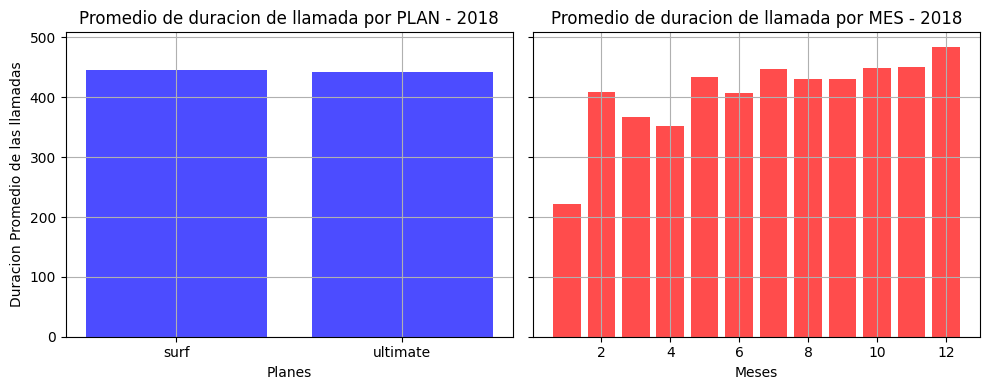

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

ave_llamada_plan = data_merged.groupby('plan_name')['Duracion total llamada'].mean().reset_index()
ave_llamada_mes = data_merged.groupby('month')['Duracion total llamada'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4),sharey=True)
ax1.bar(ave_llamada_plan['plan_name'], ave_llamada_plan['Duracion total llamada'], color='b', alpha=0.7)
ax1.set_title('Promedio de duracion de llamada por PLAN - 2018')
ax1.set_xlabel('Planes')
ax1.set_ylabel('Duracion Promedio de las llamadas')
ax1.grid(True)
#ax1.legend()

ax2.bar(ave_llamada_mes['month'], ave_llamada_mes['Duracion total llamada'], color='r', alpha=0.7)
ax2.set_title('Promedio de duracion de llamada por MES - 2018')
ax2.set_xlabel('Meses')
ax2.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Se observa que el promedio de duracion de llamadas por plan son muy similares 450 min en promedio </b>
    <br>
<br><b>Mientras que el analizis mensual, se aprecia que en promedio en el mes 12 (diciembre) es donde se realizan las llamadas con mayor duracion</b><a class="tocSkip"></a>
</div>

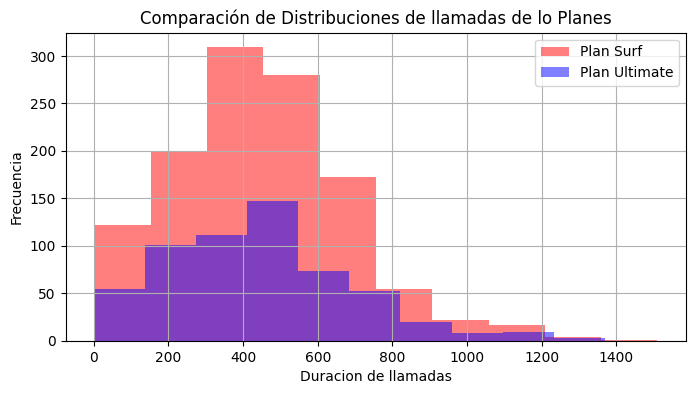

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar por plan y sumar los minutos
llamada_total_plan = data_merged[['plan_name','Duracion total llamada']]
llamada_total_plan_surf = llamada_total_plan[llamada_total_plan['plan_name'] == 'surf']
llamada_total_plan_ultimate = llamada_total_plan[llamada_total_plan['plan_name'] == 'ultimate']

# Crear un histograma
plt.figure(figsize=(8, 4))

# Dibujar el histograma del primer DataFrame
plt.hist(llamada_total_plan_surf['Duracion total llamada'], alpha=0.5, label='Plan Surf', color='red')

# Dibujar el histograma del segundo DataFrame
plt.hist(llamada_total_plan_ultimate['Duracion total llamada'], alpha=0.5, label='Plan Ultimate', color='blue')

# Añadir etiquetas y título
plt.xlabel('Duracion de llamadas')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribuciones de llamadas de lo Planes')
plt.grid()
plt.legend()

# Mostrar el histograma
plt.show()


<div class="alert alert-block alert-info">
<b>Se observa en el histograma que el plan Surf tiene una frecuencia en llamadas mayor que el plan Ultimate. Se aprecia que en el plan Surf las llamadas de 350 a 400 min son mas frecuentes al mes, mienstras que en el plan ultimate las llamadas en el rango de 400 a 500 min de duracion son mas frecuentes. Se puede inferir que en el plan Surf se muchas llamadas de corta duracion mientras que en el plan Ultimate se realizan pocas llamadas pero de mayor duracion</b><a class="tocSkip"></a>
</div>

[Calcula la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_plan = data_merged.groupby(['plan_name'])['Duracion total llamada'].mean().reset_index()
mean_plan.columns = ['plan_name', 'mean']
mean_plan

,plan_name,mean
0,surf,445.775424
1,ultimate,442.512953


In [35]:
var_plan = data_merged.groupby(['plan_name'])['Duracion total llamada'].var().reset_index()
var_plan.columns = ['plan_name', 'var']
var_plan

,plan_name,var
0,surf,55321.412627
1,ultimate,62288.399053


<AxesSubplot:xlabel='plan_name', ylabel='Duracion total llamada'>

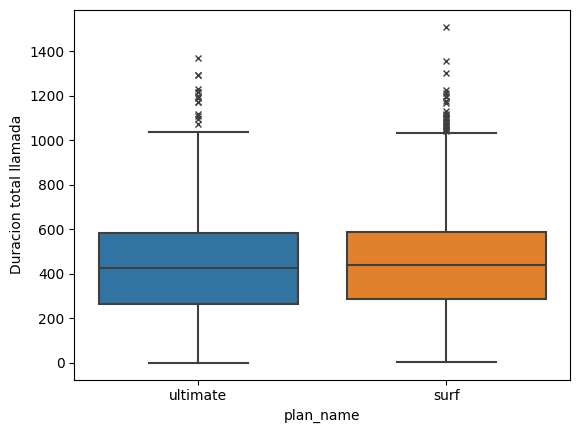

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns

sns.boxplot(data = llamada_total_plan,
            x= 'plan_name',
            y= 'Duracion total llamada',
           flierprops={"marker": "x"})

<div class="alert alert-block alert-info">
<b>Se observa en el diagrama de caja que la media y los cuartiles Q1 y Q3 son muy similares, lo que quiere decir que el comportamiendo de llamadas de los usuarios por plan es similar. Existe una diferencia en los outliners, debido a que en el plan Surf hay ciertos usuarios con llamadas de larga duracion pero con una frecuencia muy baja</b><a class="tocSkip"></a>
</div>

### Mensajes

Total de mensajes PLAN SURF:  46598.0
Total de mensajes PLAN ULTIMATE:  26898.0


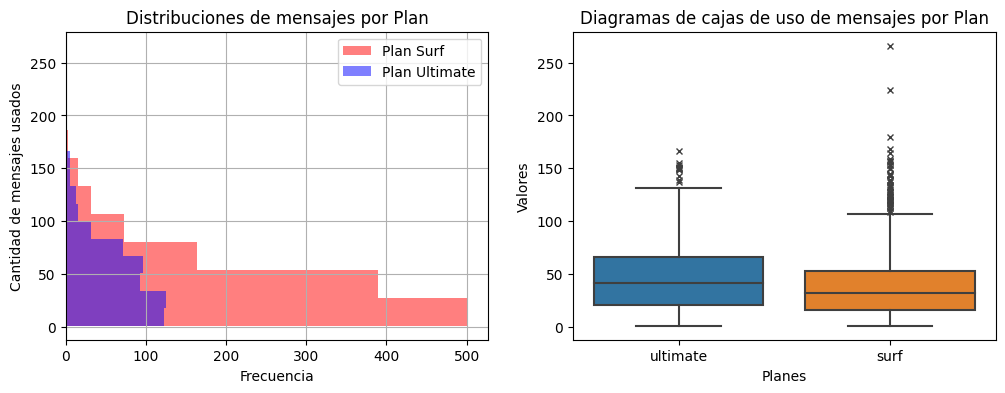

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupar por plan y sumar los mensajes
mensajes_total_plan = data_merged[['plan_name','Cantidad de mensajes']]
mensajes_total_plan_surf = mensajes_total_plan[mensajes_total_plan['plan_name'] == 'surf']
mensajes_total_plan_ultimate = mensajes_total_plan[mensajes_total_plan['plan_name'] == 'ultimate']

print('Total de mensajes PLAN SURF: ', mensajes_total_plan_surf['Cantidad de mensajes'].sum())
print('Total de mensajes PLAN ULTIMATE: ', mensajes_total_plan_ultimate['Cantidad de mensajes'].sum())

# Crear una figura con dos filas y una columna
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Ajustar el espacio entre subplots
fig.subplots_adjust(hspace=0.4)

# Histograma

axs[0].hist(mensajes_total_plan_surf['Cantidad de mensajes'], alpha=0.5, label='Plan Surf', color='red', orientation='horizontal')
axs[0].hist(mensajes_total_plan_ultimate['Cantidad de mensajes'], alpha=0.5, label='Plan Ultimate', color='blue', orientation='horizontal')
axs[0].set_title('Distribuciones de mensajes por Plan')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Cantidad de mensajes usados')
axs[0].grid()
axs[0].legend()

# Diagrama de cajas
sns.boxplot(data = mensajes_total_plan,
            x= 'plan_name',
            y= 'Cantidad de mensajes',
           flierprops={"marker": "x"})
axs[1].set_title('Diagramas de cajas de uso de mensajes por Plan')
axs[1].set_xlabel('Planes')
axs[1].set_ylabel('Valores')

# Mostrar el histograma
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-info">
<ol>
<li><b>Usuarios del plan SURF tienden a enviar mas mensajes que el plan ULTIMATE, sobre todo en el rango de 0 a 50 mensajes, que es su limite mensual de su plan</b></li>
<li><b>La media de mensajes mensuales del plan ULTIMATE es mayor a la media de mensajes del plan SURF</b></li>
<li><b>Hay ciertos usuarios en el plan SURF que envian mas de 200 mensajes al mes, pagando un adicional al mes</b>
<li><b>Los usuarios del plan ULTIMATE no tienen a pagar adicional por el uso de mensajes de texto debido a que no superan su limite de 1000 mensajes al mes</b></li> <a class="tocSkip"></a>
</div>

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Total de GB PLAN SURF:  47517.0
Total de GB PLAN ULTIMATE:  23817.0


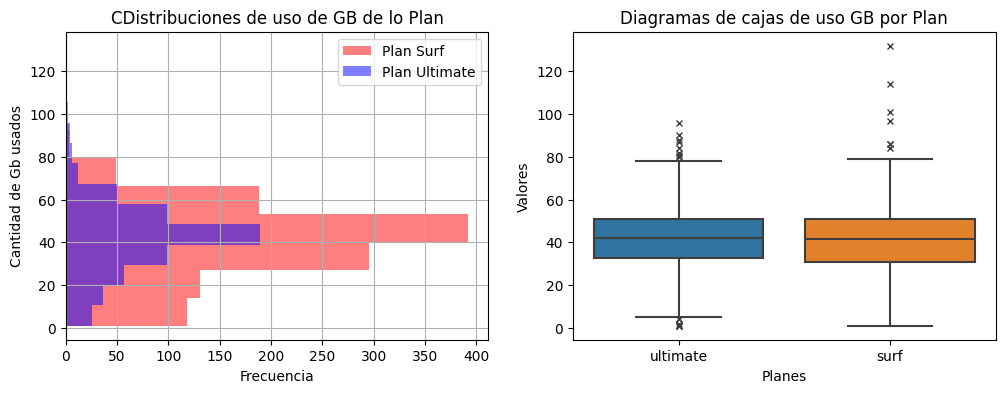

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupar por plan y sumar los mensajes
gb_total_plan = data_merged[['plan_name','gb_used']]
gb_total_plan_surf = gb_total_plan[gb_total_plan['plan_name'] == 'surf']
gb_total_plan_ultimate = gb_total_plan[gb_total_plan['plan_name'] == 'ultimate']

print('Total de GB PLAN SURF: ', gb_total_plan_surf['gb_used'].sum())
print('Total de GB PLAN ULTIMATE: ', gb_total_plan_ultimate['gb_used'].sum())

# Crear una figura con dos filas y una columna
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Ajustar el espacio entre subplots
fig.subplots_adjust(hspace=0.4)

# Histograma

axs[0].hist(gb_total_plan_surf['gb_used'], alpha=0.5, label='Plan Surf', color='red', orientation='horizontal')
axs[0].hist(gb_total_plan_ultimate['gb_used'], alpha=0.5, label='Plan Ultimate', color='blue', orientation='horizontal')
axs[0].set_title('CDistribuciones de uso de GB de lo Plan')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Cantidad de Gb usados')
axs[0].grid()
axs[0].legend()

# Diagrama de cajas
sns.boxplot(data = gb_total_plan,
            x= 'plan_name',
            y= 'gb_used',
           flierprops={"marker": "x"})
axs[1].set_title('Diagramas de cajas de uso GB por Plan')
axs[1].set_xlabel('Planes')
axs[1].set_ylabel('Valores')

# Mostrar el histograma
plt.show()

<div class="alert alert-block alert-info">
<ol>
<li><b>La media de consumo de GB en cada plan es similar, aproximadamente 40 GB al mes</b></li>
<li><b>Mas usuarios del plan ULTIMATE y SURF tienden a usar una media de GB mensual de 40 GB a pesar de que sus planes solo incluiye 30 y 15 GB al mes respectivamente</b></li>
<li><b>Usuarios del plan Surf consumen mas GB que los usuarios del plan ULTIMATE</b></li> <a class="tocSkip"></a>
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Total de Ingreso Plan SURF:  333730.69
Total de Ingreso Plan ULTIMATE:  95578.0
Media de Ingreso Plan SURF:  282.8226186440678
Media de Ingreso Plan ULTIMATE:  165.07426597582037


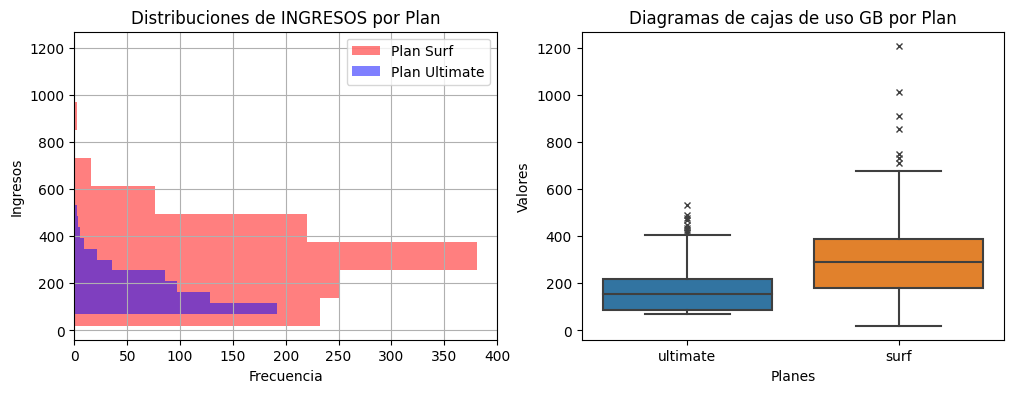

In [39]:
# Compara la cantidad de ingresos por plan
Pago_usuarios = data_merged[['user_id','plan_name','month','gb_used','Pago Mensual']]

# Agrupar por plan y sumar el pago
pago_total_plan = Pago_usuarios[['plan_name','Pago Mensual']]
pago_total_plan_surf = pago_total_plan[pago_total_plan['plan_name'] == 'surf']
pago_total_plan_ultimate = pago_total_plan[pago_total_plan['plan_name'] == 'ultimate']

print('Total de Ingreso Plan SURF: ', pago_total_plan_surf['Pago Mensual'].sum())
print('Total de Ingreso Plan ULTIMATE: ', pago_total_plan_ultimate['Pago Mensual'].sum())

print('Media de Ingreso Plan SURF: ', pago_total_plan_surf['Pago Mensual'].mean())
print('Media de Ingreso Plan ULTIMATE: ', pago_total_plan_ultimate['Pago Mensual'].mean())

# Crear una figura con dos filas y una columna
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Ajustar el espacio entre subplots
fig.subplots_adjust(hspace=0.4)

# Histograma

axs[0].hist(pago_total_plan_surf['Pago Mensual'], alpha=0.5, label='Plan Surf', color='red', orientation='horizontal')
axs[0].hist(pago_total_plan_ultimate['Pago Mensual'], alpha=0.5, label='Plan Ultimate', color='blue', orientation='horizontal')
axs[0].set_title('Distribuciones de INGRESOS por Plan')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Ingresos')
axs[0].grid()
axs[0].legend()

# Diagrama de cajas
sns.boxplot(data = pago_total_plan,
            x= 'plan_name',
            y= 'Pago Mensual',
           flierprops={"marker": "x"})
axs[1].set_title('Diagramas de cajas de uso GB por Plan')
axs[1].set_xlabel('Planes')
axs[1].set_ylabel('Valores')

# Mostrar el histograma
plt.show()

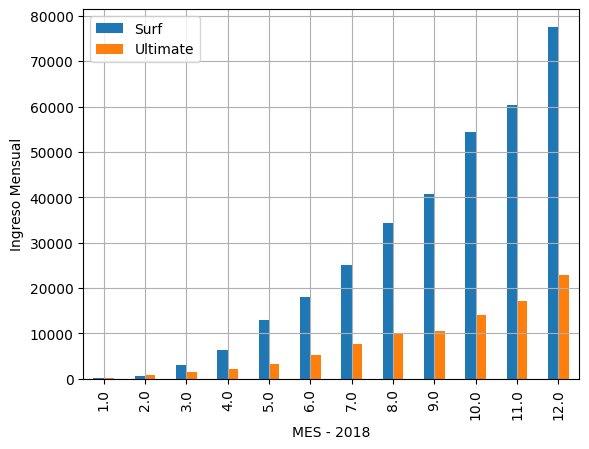

In [40]:
# Agrupar por plan y sumar el pago
Pago_Mensual = data_merged[['plan_name','month','Pago Mensual']]

# Agrupar por plan y sumar el pago
pago_total_plan_mes_surf = Pago_Mensual[Pago_Mensual['plan_name']=='surf']
pago_total_plan_mes_surf = pago_total_plan_mes_surf.groupby(['month'])['Pago Mensual'].sum()

pago_total_plan_mes_ultimate = Pago_Mensual[Pago_Mensual['plan_name']=='ultimate']
pago_total_plan_mes_ultimate = pago_total_plan_mes_ultimate.groupby(['month'])['Pago Mensual'].sum()

df_concat = pd.concat([pago_total_plan_mes_surf , pago_total_plan_mes_ultimate], axis='columns')
df_concat.columns = ['Surf', 'Ultimate']

df_concat.plot(kind='bar',
           ylabel = 'Ingreso Mensual',
           xlabel = 'MES - 2018',    
           grid = True)

plt.show()

<div class="alert alert-block alert-info">
<ol>
<li><b>El total de ingresos por plan es: Plan SURF = 333730.69 USD, Plan ULTIMATE = 95578.0 USD</b></li>
<li><b>El plan Surf brinda mayor ingresos con una media mensual de 282 USD sobre los 165 USD del plan Ultimate</b></li>
<li><b>Los ingresos mensuales del plan Surf son mayores al del plan Ultimate en los 12 meses del ano 2018</b></li> <a class="tocSkip"></a>
</div>

## Prueba las hipótesis estadísticas

### PRUEBA DE HIPOTESIS 1
Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

$H_(0):$ **No hay diferencias entre las medias poblacionales:**

$\mu (Ingreso Ultimate) - \mu (Ingreso Surf) = 0$

$H_(a):$ **Hay diferencias entre las medias poblacionales:**

$\mu (Ingreso Ultimate) - \mu (Ingreso Surf) ≠ 0$

In [41]:
#Calculamos la varianza para saber si son iguales:

print(np.var(pago_total_plan_surf['Pago Mensual']))
print(np.var(pago_total_plan_ultimate['Pago Mensual']))

25476.564128142705
7147.978940523385


In [42]:
alpha = 0.05  # el nivel de significancia estadística crítica

#Las varianzas son diferentes
results = st.ttest_ind(pago_total_plan_surf['Pago Mensual'], pago_total_plan_ultimate['Pago Mensual'], equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.005225561054736e-81
Rechazamos la hipótesis nula


<div class="alert alert-block alert-info">
<b>Rechazamos la hipotesis nula, las medias poblacionales de cada plan es diferente. Por la data que se tiene se puede indicar que el plan Surf brinda mayuor ingresos economicos</b>
</div>

### PRUEBA DE HIPOTESIS 2
Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

$H_(0):$ **No hay diferencias entre las medias poblacionales:**

$\mu (Ingreso Area NY-NJ)  - \mu (Ingreso Otras Regiones) = 0$

$H_(a):$ **Hay diferencias entre las medias poblacionales:**

$\mu ((Ingreso Area NY-NJ)  - \mu (Ingreso Otras Regiones)  ≠ 0$

In [43]:
#Filtramos la data por el estado de NY-NJ y por el resto de estados

Data_estado = data_merged[['Estado','Pago Mensual']]

Data_NYNJ = Data_estado[Data_estado['Estado'].str.contains('NY-NJ')]
#Data_NYNJ = Data_NYNJ['Pago Mensual']
Otros_estados = Data_estado[~Data_estado['Estado'].str.contains('NY-NJ')]
#Otros_estados = Otros_estados['Pago Mensual']

In [44]:
#Calculamos la varianza para saber si son iguales:
print(np.var(Data_NYNJ))
print(np.var(Otros_estados))

Pago Mensual    18385.95964
dtype: float64
Pago Mensual    23260.809027
dtype: float64


In [45]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

#Las varianzas son diferentes
results = st.ttest_ind(Data_NYNJ['Pago Mensual'], Otros_estados['Pago Mensual'], equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.20786207648479904
No podemos rechazar la hipótesis nula


Total de Ingreso NY-NJ:  70773.04000000001
Total de Ingreso Otros Estados:  358535.65
Media de Ingreso NY-NJ:  253.66681003584233
Media de Ingreso Otros Estados:  242.25381756756758


/tmp/ipykernel_237/2347726980.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Otros_estados['Estado'] = 'Otros'


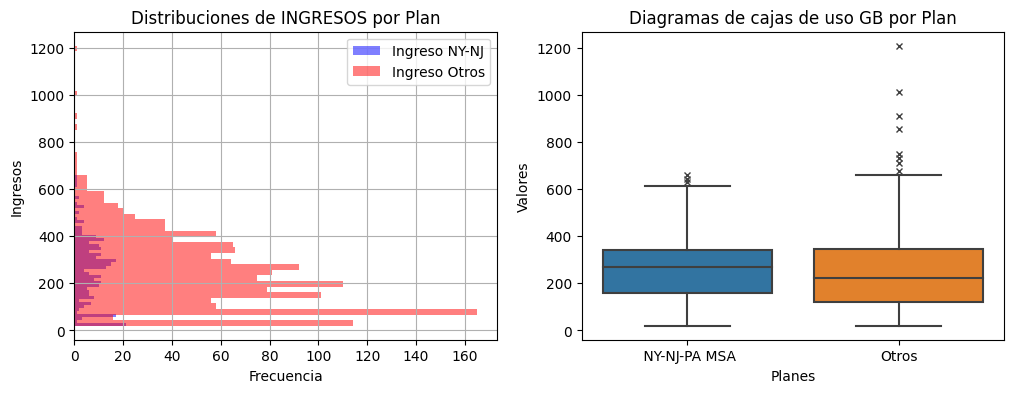

In [53]:
print('Total de Ingreso NY-NJ: ', Data_NYNJ['Pago Mensual'].sum())
print('Total de Ingreso Otros Estados: ', Otros_estados['Pago Mensual'].sum())

print('Media de Ingreso NY-NJ: ', Data_NYNJ['Pago Mensual'].mean())
print('Media de Ingreso Otros Estados: ', Otros_estados['Pago Mensual'].mean())

# Crear una figura con dos filas y una columna
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Ajustar el espacio entre subplots
fig.subplots_adjust(hspace=0.4)

# Histograma

axs[0].hist(Data_NYNJ['Pago Mensual'], alpha=0.5, label='Ingreso NY-NJ', color='blue',bins = 50,orientation='horizontal')
axs[0].hist(Otros_estados['Pago Mensual'], alpha=0.5, label='Ingreso Otros', color='red', bins = 50,orientation='horizontal') 
axs[0].set_title('Distribuciones de INGRESOS por Plan')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Ingresos')
axs[0].grid()
axs[0].legend()


Otros_estados['Estado'] = 'Otros'

df_concat2 = pd.concat([Data_NYNJ, Otros_estados ], axis='rows')

#Diagrama de cajas
sns.boxplot(data = df_concat2,
            x= 'Estado',
            y= 'Pago Mensual',
           flierprops={"marker": "x"})

axs[1].set_title('Diagramas de cajas de uso GB por Plan')
axs[1].set_xlabel('Planes')
axs[1].set_ylabel('Valores')

# Mostrar el histograma
plt.show()

<div class="alert alert-block alert-info">
<b>NO rechazamos la hipotesis nula, las medias poblacionales del estado NY-NJ son casi iguales a las de los otros estados, con el 95% de probabilidad que se repitan. Y presentan un distribucion similar<br> Por lo que podemos decir que el ingreso promedio es similar</b>
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

<div class="alert alert-block alert-info">
<ol>
<li><b>LLAMADAS POR PLAN: La distribucion y promedio entre la duracion de llamadas por plan es similar.</b><br>Con un consumo mayor del plan SURF</li>
<li><b>MENSAJES POR PLAN: La distribucion y promedio entre el envio de mensajes es mayor para el plan ULTIMATE.</b><br>Con un consumo mayor del plan SURF</li>
<li><b>INTERNET POR PLAN: La distribucion y promedio entre el consumo de internet por plan es similar. </b><br>Con un consumo mayor del plan SURF, promedio = 40 GB cuando su plan solo invluye 15 GB, paganso 10 USD por GB adicional</li>
<li><b>INGRESO POR PLAN: La distribucion y promedio entre el ingreso por plan es mayor para el plan SURF.</b><br>Con un ingreso mayor del plan SURF</li>
<li><b>PRUEBA DE HIPOTESIS:</b><br><b>HIPOTESIS 1</b> - Indico que los ingresos promedio de ambos planes es diferente, lo cual se demuestra con la data que el PLAN SURF brinda mayor ingresos<br><b>HIPOTESIS 2</b> - Indico que los ingresos promedio entre las ciudades de NY-NJ y las demas tienen una distribucion y promedio similiar, suponiendo que los usuarios tienen el mismo comportamiento de consumo</li>
<br>
<li><b>CONCLUSIONES:</b><br>El plan Surf brinda mejores beneficios a la compania.<br>Los usuarios del plan SURF pagan mas del doble de sus costo fijo mensual de su plan solo por el exeso de consumos de GB.<br>Los usuarios del plan ULTIMATE no superan sus limites de consumo de llamas ni mensajes de texto, teniendo un mismo promedio de consumo de GB que los usuarios del plan SURF pero no pagan excedentes por que su plan incluye mayor cantidad de GB.<br>Podemos maximizar el beneficio de la compania haciendo mayor campana al plan SURF </li>   
    <a class="tocSkip"></a>
</div>